# Step 1: Using Build a CNN — experiment with Fashion-MNIST

- Tip: use early stopping in the validation set
- Tip: use the pipeline mentioned in https://www.tensorflow.org/datasets/keras_example

## Step 1.1: Load the libraries and the fashion mnist dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import activations, datasets, layers, models, losses

In [2]:
# Load data
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Step 1.2: Separate and normalize the training and evaluation data.

In [3]:
# Normalize training data / 255
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
# 
# Expand training test dimentions for alexnet by repeating data
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

# Separating training and evaluation data
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

2022-12-25 13:00:05.124100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-25 13:00:05.124164: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-25 13:00:05.124211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (prod02): /proc/driver/nvidia/version does not exist
2022-12-25 13:00:05.124847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Step 1.3: Create and train the model.

In [4]:
# Create model Alexnet
model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]),

  tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'),
  tf.keras.layers.Lambda(tf.nn.local_response_normalization),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(3, strides=2),

  tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'),
  tf.keras.layers.Lambda(tf.nn.local_response_normalization),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(3, strides=2),

  tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [5]:
# Compile
optimizer = 'adam'
loss = losses.sparse_categorical_crossentropy
metrics = ['accuracy']

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [6]:
# Training
batch_size=64
epochs=40

# history = model.fit(
#     x_train, y_train, 
#     batch_size=batch_size, 
#     epochs=epochs, 
#     validation_data=(x_val, y_val)
# )

The model was trained in a local server with high resources:
- ram: 200 GB
- cpus: 60 cores

So, instead of running the training process, I will upload the model and the history training pickle into variables.

In [9]:
model = tf.keras.models.load_model('models/alexnet.h5', compile=False)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [11]:
history = pd.read_pickle('history/alexnet.pickle')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-25 05:40:14        15294
metadata.json                                  2022-12-25 05:40:14           64
variables.h5                                   2022-12-25 05:40:16    259535376
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......activation_4
.........vars
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.....

## Step 1.4: Evaluate and save model.



In [13]:
# Evaluate
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
test = model.evaluate(x_test, y_test)

313/313 [==============================] - 27s 85ms/step - loss: 0.0870 - accuracy: 0.9898


In [ ]:
# # Save model
# model_name = "alexnet.h5"
# model.save(model_name)

# # Save history
# with open('alexnet.pickle', 'wb') as f:
#     pickle.dump(history, f)

# Step 2: Plot learning curves (loss, validation loss)

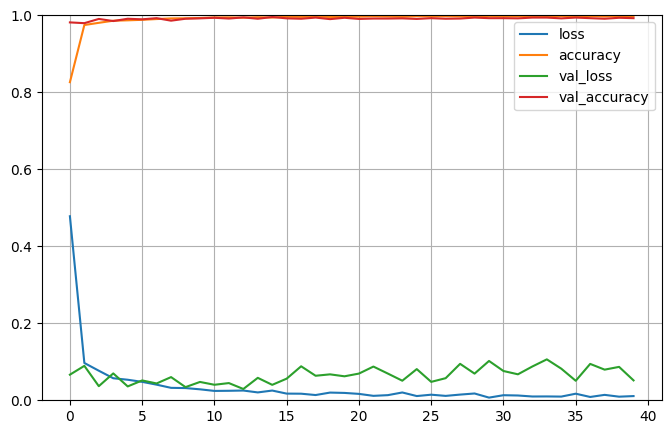

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Step 3: Report the error in the test set

In [15]:
get_percentage_str = lambda x: str(round(x*100,4))
print("Accuracy of the test set is {}%".format(get_percentage_str(test[1])))
print("Error of the test set is {}%".format(get_percentage_str(test[0])))

Accuracy of the test set is 98.98%
Error of the test set is 8.7009%
